# Car Model Classification
## 3 Models
- audi
- benz
- grandeur

## Import Modules

In [1]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import cv2
np.random.seed(5)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Visualization Datasets
- Train data
- Distorted car radiator which we generated

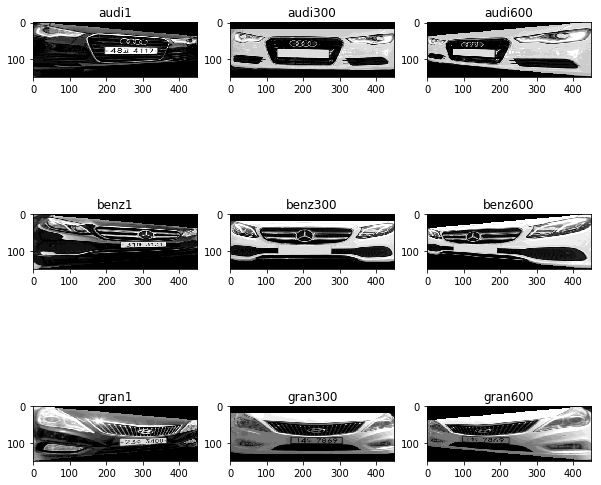

In [2]:
model_name = ['audi', 'benz', 'gran']
num = [1, 300, 600]
i = 1
path = 'car_image/image_radi_train200_test50_4bit_3class/train200'
plt.figure(figsize = (10,10))
for m in model_name:
    for n in num:
        img = cv2.imread(path + '/{}_train200/{}.png'.format(m, n))
        plt.subplot(3,3,i)
        plt.imshow(img, cmap = plt.cm.gray)
        plt.title('{}{}'.format(m, n))
        i += 1

# Deep Learning
- We used Keras for Deep Learning.
- Keras is easy to use for Deep Learning beginner(I guess....).

## Setting Datasets
- In this case, we use ImageDataGenerator to make adequate train-test dataset format for CNN
- We have 3 classes, each class has 303 train images, 50 test images.

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    'car_image/image_radi_train200_test50_4bit_3class/train200',
    target_size = (90,150),
    batch_size = 4,
    class_mode = 'categorical',
    shuffle = True)  

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    'car_image/image_radi_train200_test50_4bit_3class/test50',
    target_size = (90,150), # 120, 265 original
    batch_size = 1,
    class_mode = 'categorical')

Found 1809 images belonging to 3 classes.
Found 306 images belonging to 3 classes.


## Construction of CNN model
- There is no precise answer about CNN model composition, so we done several tries to get best model

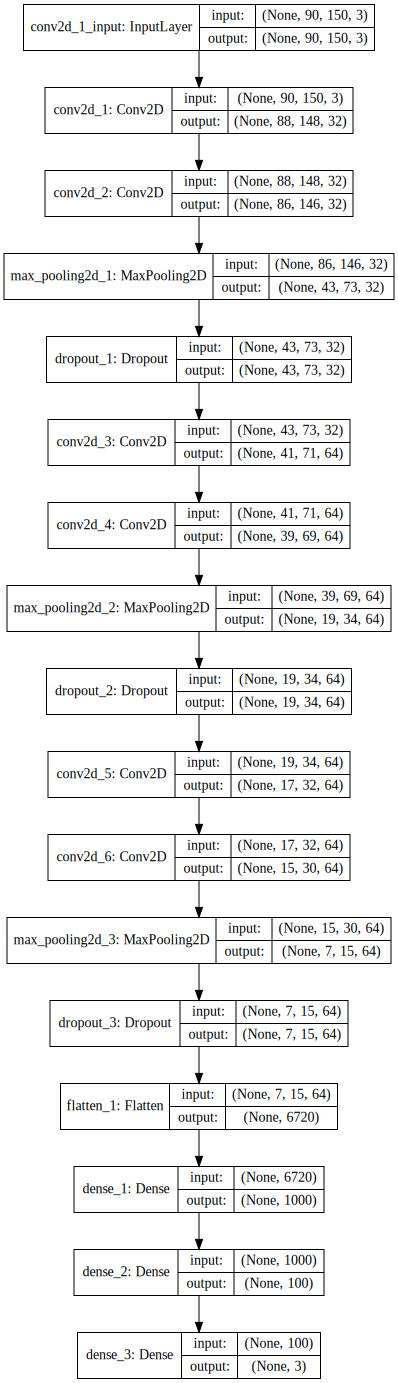

In [4]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (90, 150, 3)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
#opt = SGD(lr=0.01)
#model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ['accuracy'])
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))

## Training data

In [5]:
step = 50
epoch = 10

hist = model.fit_generator(
    train_generator,
    steps_per_epoch = step,
    epochs = epoch,
    validation_data = test_generator)

Epoch 1/10
50/50 [==============================] - 28s 570ms/step - loss: 1.0774 - acc: 0.3851 - val_loss: 1.0114 - val_acc: 0.7484
Epoch 2/10
50/50 [==============================] - 29s 583ms/step - loss: 0.7213 - acc: 0.6850 - val_loss: 0.7308 - val_acc: 0.5458
Epoch 3/10
50/50 [==============================] - 29s 578ms/step - loss: 0.3331 - acc: 0.9100 - val_loss: 0.0435 - val_acc: 1.0000
Epoch 4/10
50/50 [==============================] - 29s 574ms/step - loss: 0.0167 - acc: 0.9950 - val_loss: 0.0310 - val_acc: 0.9902
Epoch 5/10
50/50 [==============================] - 29s 590ms/step - loss: 0.0790 - acc: 0.9750 - val_loss: 0.0359 - val_acc: 1.0000
Epoch 6/10
50/50 [==============================] - 29s 581ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 7/10
50/50 [==============================] - 28s 561ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 8/10
50/50 [==============================] - 29s 582ms/step - 

## Result of trained model

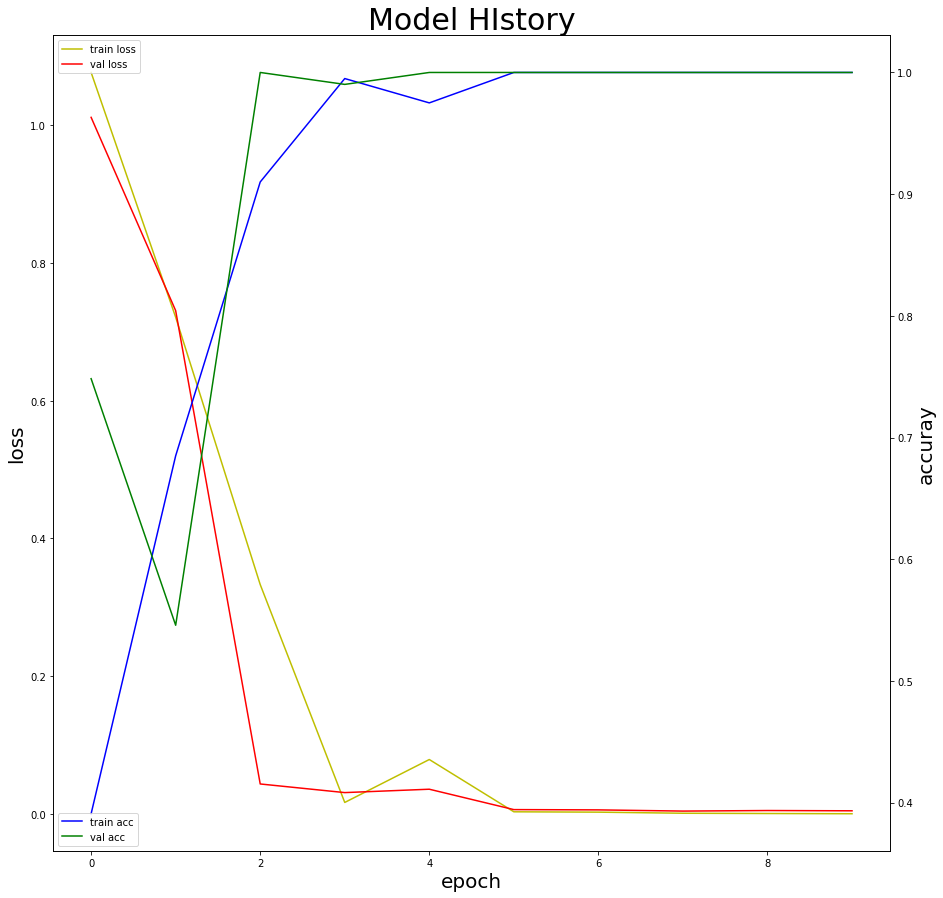

-- Evaluation --
acc : 100.00%


In [6]:
fig, loss_ax = plt.subplots(figsize = (15,15))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch', fontsize = 20)
loss_ax.set_ylabel('loss', fontsize = 20)
acc_ax.set_ylabel('accuray', fontsize = 20)

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title('Model HIstory', fontsize = 30)
plt.savefig('Keras.jpg')
plt.show()

print('-- Evaluation --')
scores = model.evaluate_generator(test_generator, steps = 3)
print('%s : %0.2f%%' %(model.metrics_names[1], scores[1]*100))

# Prediction
- We use original car image of each class.
- Each class has 5 images.

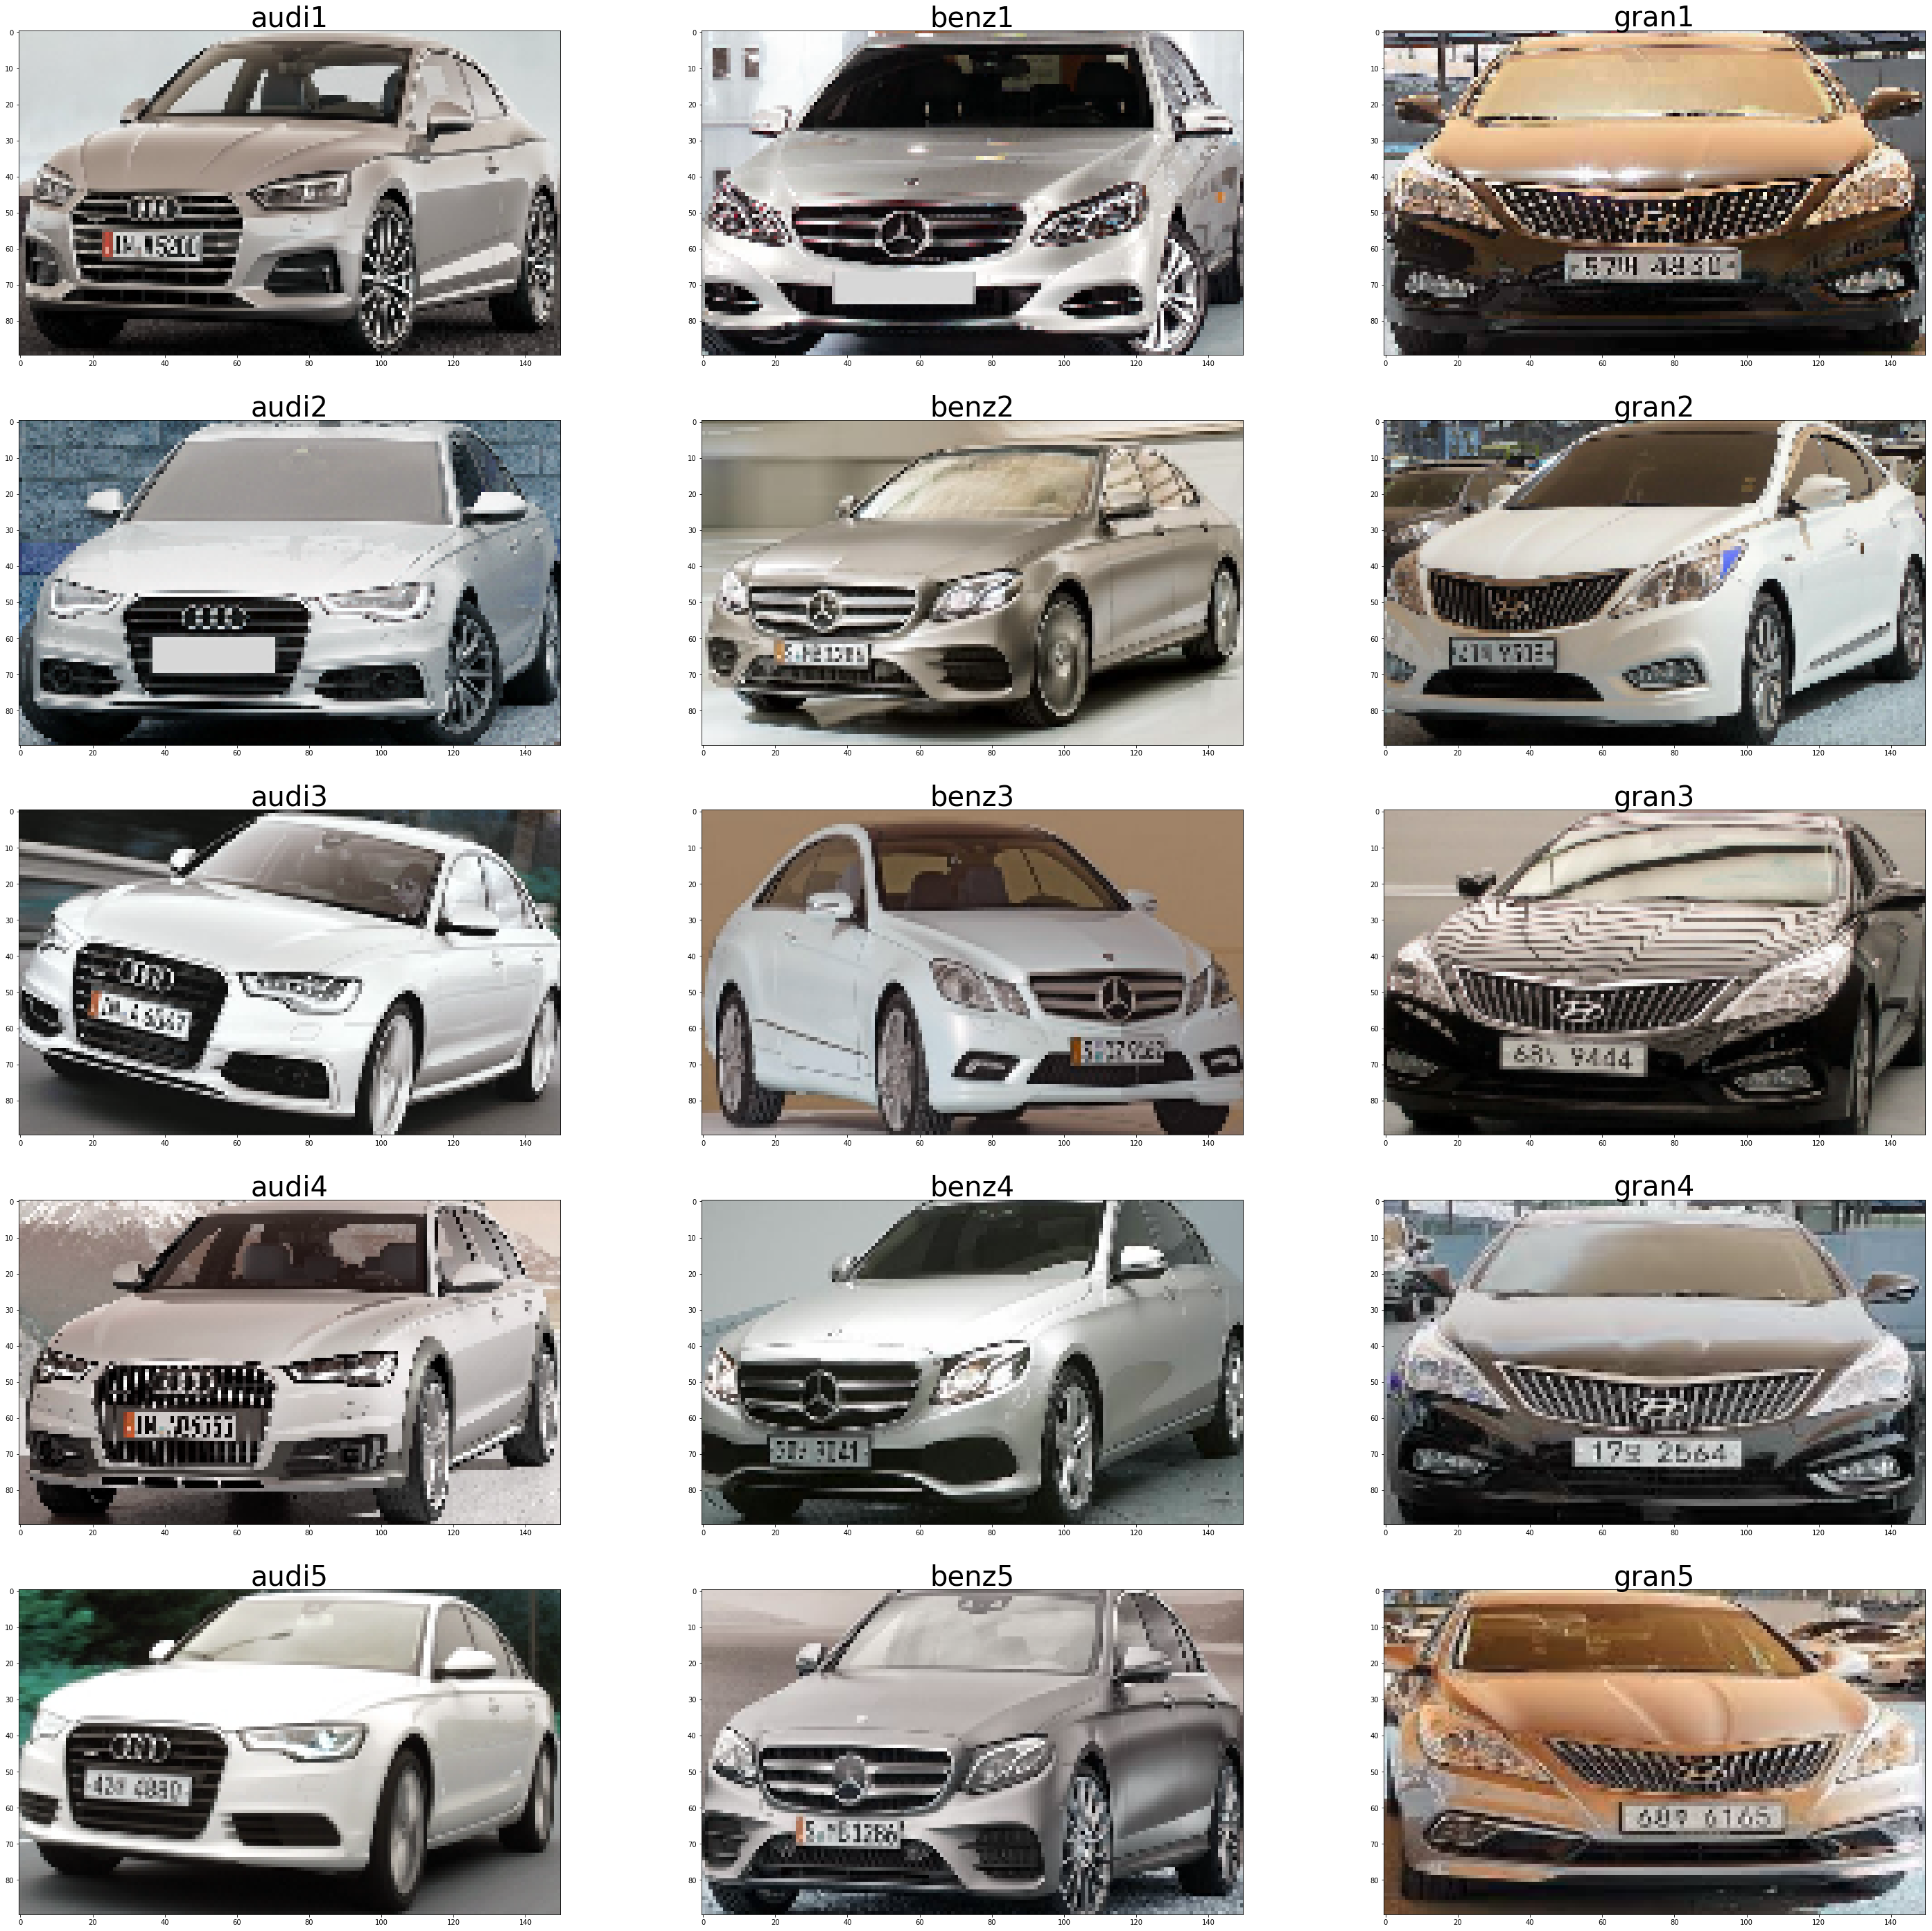

In [7]:
plt.figure(figsize = (50,50))
for m, i in zip(model_name, range(1,4)):
    for n in range(1,6):
        img = cv2.imread('car_image/image_prediction_original_4bit/{}/pre_{}.png'.format(m, n))
        img = cv2.resize(img, (150, 90), interpolation=cv2.INTER_LINEAR)
        plt.subplot(5,3,i)
        plt.imshow(img, cmap = plt.cm.gray)
        plt.title('{}{}'.format(m,n), fontsize = 40)
        i += 3

In [8]:
pre_datagen = ImageDataGenerator(rescale=1./255)
pre_generator = pre_datagen.flow_from_directory(
        'car_image/image_prediction_radi_4bit',
        target_size=(90, 150),
        class_mode='categorical')

scores = model.evaluate_generator(pre_generator)
print('%s : %0.2f%%' %(model.metrics_names[1], scores[1]*100))
filenames = pre_generator.filenames
nb_samples = len(filenames)
print(filenames)

print('-- prediction --')

output = model.predict_generator(pre_generator) # steps = nb_samples
np.set_printoptions(formatter = {'float': lambda x: '{0:0.3f}'.format(x)})
print(pre_generator.class_indices)
print(output)

import pandas as pd
#output = np.where(output <= 0.0009, 0, output)
df = pd.DataFrame(output, columns = list(pre_generator.class_indices.keys()))

def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

df.style.apply(highlight_max, axis = 1)

df = df.reindex(df.idxmax(axis = 1).sort_values().index)
df = df.reset_index(drop = True)
df.style.apply(highlight_max, axis = 1)

Found 15 images belonging to 3 classes.
acc : 73.33%
['audi\\pre_1.png', 'audi\\pre_2.png', 'audi\\pre_3.png', 'audi\\pre_4.png', 'audi\\pre_5.png', 'benz\\pre_1.png', 'benz\\pre_2.png', 'benz\\pre_3.png', 'benz\\pre_4.png', 'benz\\pre_5.png', 'gran\\pre_1.png', 'gran\\pre_2.png', 'gran\\pre_3.png', 'gran\\pre_4.png', 'gran\\pre_5.png']
-- prediction --
{'audi': 0, 'benz': 1, 'gran': 2}
[[0.000 1.000 0.000]
 [0.000 0.108 0.892]
 [0.051 0.944 0.005]
 [0.001 0.998 0.001]
 [0.000 1.000 0.000]
 [0.007 0.234 0.758]
 [0.306 0.687 0.008]
 [0.947 0.052 0.002]
 [0.974 0.026 0.000]
 [0.001 0.007 0.992]
 [0.000 1.000 0.000]
 [0.005 0.995 0.001]
 [0.964 0.029 0.007]
 [0.000 0.947 0.052]
 [0.000 0.999 0.001]]


,audi,benz,gran
0,0.946775,0.0516084,0.00161627
1,0.97385,0.0257754,0.000374945
2,0.964229,0.0287925,0.00697899
3,9.74549e-08,0.999982,1.79237e-05
4,0.0511836,0.943547,0.00526967
5,0.00104294,0.998107,0.000850109
6,4.18153e-07,0.999975,2.45647e-05
7,0.305722,0.686554,0.00772441
8,2.1456e-07,0.999738,0.000261298
9,0.00462795,0.994514,0.000858025


In [9]:
from keras.preprocessing import image
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(90, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

models_name = ['audi', 'benz', 'gran' ]
models_n = np.arange(1,6)
for models in models_name:
    print(models)
    for model_n in models_n:            
        im_path = 'car_image/image_prediction_original_4bit/{}/pre_{}.png'.format(models, model_n)
        new_image = load_image(im_path)
        pred = model.predict(new_image)
        print(pred)

    print('\n')

audi
[[0.001 0.029 0.970]]
[[0.703 0.280 0.018]]
[[0.000 0.131 0.869]]
[[0.004 0.206 0.790]]
[[0.003 0.000 0.997]]


benz
[[0.999 0.000 0.001]]
[[0.001 0.781 0.218]]
[[0.108 0.272 0.619]]
[[0.000 0.043 0.957]]
[[0.001 0.024 0.974]]


gran
[[0.123 0.017 0.860]]
[[0.000 0.004 0.996]]
[[0.027 0.320 0.653]]
[[0.320 0.015 0.664]]
[[0.000 0.009 0.991]]




## If you want to predict other images, use this code

In [ ]:
import cv2
from keras.preprocessing import image
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(90, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

im_path = 'url_of_image'                                           # Put image you want to predict
new_image = load_image(im_path)
pred = model.predict(new_image)
print(pre_generator.class_indices)
print(pred)
import cv2
img = cv2.imread(im_path)
plt.imshow(img, cmap = plt.get_cmap('gray'))

import pandas as pd
#output = np.where(output <= 0.0009, 0, output)
df = pd.DataFrame(pred, columns = list(pre_generator.class_indices.keys()))

def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

df.style.apply(highlight_max, axis = 1)

df = df.reindex(df.idxmax(axis = 1).sort_values().index)
df = df.reset_index(drop = True)
df.style.apply(highlight_max, axis = 1)